# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [19]:
# Load pickled data
import pickle
import numpy as np
import csv


# Reference: https://docs.python.org/2/library/csv.html
with open('signnames.csv') as csvfile:
    datareader = csv.DictReader(csvfile, quotechar='|')
    sign_identifier_dictionary = list(datareader)

CLASS_ID_KEY = 'ClassId'
SIGN_NAME_KEY = 'SignName'

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print('Succesfully Loaded Data.')

Succesfully Loaded Data.


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [20]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

15


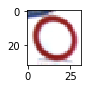

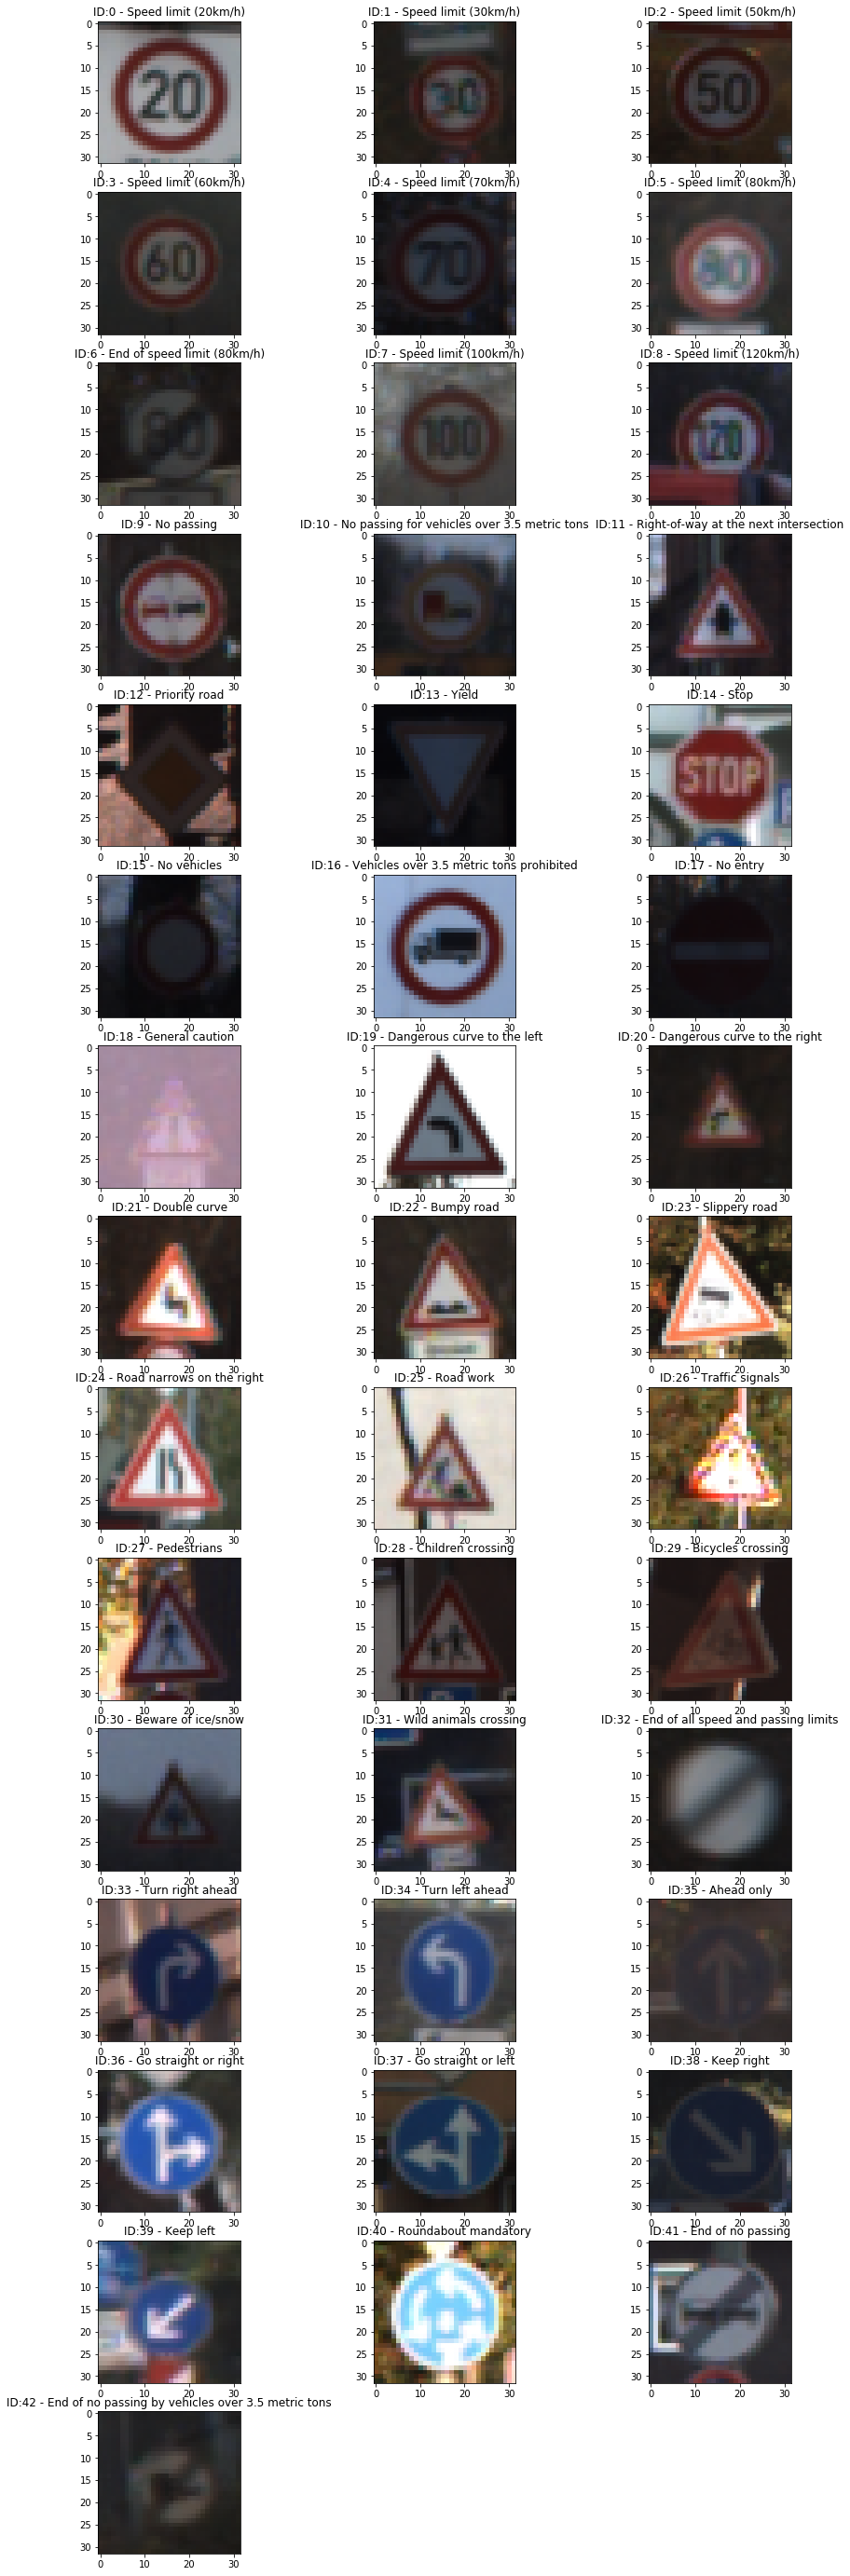

In [49]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random

# Visualizations will be shown in the notebook.
%matplotlib inline

#Shows a random image to make sure the data is being classified correctly.
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

#Plotting one image from each category of sign.
plt.figure(figsize=(15,50))
i=0
for index in range(0,n_classes):
    selected_sign_class_data_images_array = X_train[y_train == index]
    plt.subplot(15,3,index+1)
    plt.title("ID:{} - ".format(index) + sign_identifier_dictionary[index][SIGN_NAME_KEY])
    plt.imshow(selected_sign_class_data_images_array[0])
    plt.show

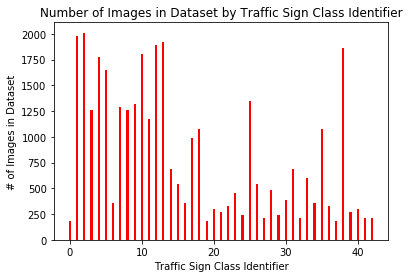

In [37]:
import collections

#Referenced from: http://matplotlib.org/examples/api/barchart_demo.html
#and http://stackoverflow.com/questions/28663856/how-to-count-the-occurrence-of-certain-item-in-an-ndarray-in-python

N = 43
width_of_bars = 0.3
classes_count_list = collections.Counter(y_train)

ind = np.arange(N)

fig, ax = plt.subplots()
plot_x_data = [] 

for index in range(0,43):
    plot_x_data.append(classes_count_list[index])

rects = ax.bar(ind, plot_x_data, width_of_bars, color = 'r')
ax.set_title('Number of Images in Dataset by Traffic Sign Class Identifier')
ax.set_ylabel('# of Images in Dataset')
ax.set_xlabel('Traffic Sign Class Identifier')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).
 
There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [23]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
def convert_to_grayscale(input):
    gray_image_data = tf.image.rgb_to_grayscale(input)
    return gray_image_data

### Model Architecture

In [24]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten
import tensorflow as tf

#Image Properties
image_width = 32
image_height = 32
color_channels = 1

#Convolution Filter Properties
filter_size_width = 2
filter_size_height = 2

#Output Depth Property
k_output = 20

#Hyperparameters
mu = 0
sigma = 0.1

#Weights and Biases for each layer of the Neural Network.

weights = [tf.Variable(tf.truncated_normal(shape = (filter_size_width, filter_size_height, color_channels, k_output), mean = mu, stddev = sigma), name = 'weight_1'),
           tf.Variable(tf.truncated_normal(shape = (2,2,20,40), mean = mu, stddev = sigma), name = 'weight_2'),
           tf.Variable(tf.truncated_normal(shape = (2,2,40,80), mean = mu, stddev = sigma), name = 'weight_3'),
           tf.Variable(tf.truncated_normal(shape = (3,3,80,160), mean = mu, stddev = sigma), name = 'weight_4'),
           tf.Variable(tf.truncated_normal(shape = (5760, 1024), mean = mu, stddev = sigma), name = 'weight_5'),
           tf.Variable(tf.truncated_normal(shape = (1024, 256), mean = mu, stddev = sigma), name = 'weight_6'),
           tf.Variable(tf.truncated_normal(shape = (256, 43), mean = mu, stddev = sigma), name = 'weight_7')
              ]

biases = [tf.Variable(tf.zeros(k_output), name = 'bias_1'),
          tf.Variable(tf.zeros(40), name = 'bias_2'),
          tf.Variable(tf.zeros(80), name = 'bias_3'),
          tf.Variable(tf.zeros(160), name = 'bias_4'),
          tf.Variable(tf.zeros(1024), name = 'bias_5'),
          tf.Variable(tf.zeros(256), name = 'bias_6'),
          tf.Variable(tf.zeros(43), name = 'bias_7')
            ]

#Computes the input through a convolution layer and RELU activation function
def conv2d(x, weight, bias, stride=1, padding = 'VALID'):
    conv2d_layer = tf.nn.conv2d(x, weight, strides = [1,stride,stride,1], padding = padding)
    conv2d_layer = tf.nn.bias_add(conv2d_layer, bias)
    return tf.nn.relu(conv2d_layer)


#Computes a MaxPool2D function for a given input and ksize.
def maxpool2d(input, k, padding = 'VALID'):
    return tf.nn.max_pool(input, ksize = [1,k,k,1], strides = [1,k,k,1], padding = padding)


#The complete deep learning network. Takes in an array input ('x') with image shape (32, 32, 3).
#Outputs logits for the 43 different traffic sign classes.
#Takes in input of weights array and biases array.
#keep_prob input is the 'Keep Probability' for Dropout layer.
#
#NOTE: Set keep_prob to 1 if you're validating or testing your network.
def conv_net(x, weights, biases, keep_prob):
    
    #Converts input images from 32*32*3 to 32*32*1
    gray = convert_to_grayscale(x)
    
    #Convolutional Layer - Inputs 32*32*1 - Outputs 31*31*20
    conv1 = conv2d(gray, weights[0], biases[0], 1)
    
    #Convolutional Layer - Inputs 31*31*20 - Outputs 30*30*40
    conv2 = conv2d(conv1, weights[1], biases[1], 1)
    
    #MaxPooling Layer - Inputs 30*30*40 - Outputs 15*15*40
    max1 = maxpool2d(conv2, k=2)
    
    #Convolutional Layer - Inputs 15*15*40 - Outputs 14*14*80
    conv3 = conv2d(max1, weights[2], biases[2], 1)
    
    #Convolutional Layer - Inputs 14*14*80 - Outputs 12*12*160
    conv4 = conv2d(conv3, weights[3], biases[3], 1)
    
    #MaxPooling Layer - Inputs 12*12*160 - Outputs 6*6*160
    max2 = maxpool2d(conv4, k=2)
    
    #Flattens - Inputs 6*6*160 - Outputs 5760
    flat = flatten(max2)
    
    #Fully-Connected Layer - Inputs 5760 - Outputs 1024
    full1 = tf.add(tf.matmul(flat, weights[4]), biases[4])
    full1 = tf.nn.relu(full1)
    
    #Dropout Layer
    drop1 = tf.nn.dropout(full1, keep_prob)
    
    #Fully-Connected Layer - Inputs 1024 - Outputs 256
    full2 = tf.add(tf.matmul(drop1, weights[5]), biases[5])
    full2 = tf.nn.relu(full2)
    
    #Final Fully-Connected Layer - Inputs 256 - Outputs 43
    logits = tf.add(tf.matmul(full2, weights[6]),biases[6])
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [25]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
import os

#Learning Rate
rate = 0.001

BATCH_SIZE = 128
EPOCHS = 10


#References Udacity Labs
x = tf.placeholder(tf.float32, [None, 32, 32, 3], name='x_input')
y = tf.placeholder(tf.int32, [None], name='y_input')

keep_prob = tf.placeholder(tf.float32, None, name='keep_prob')

one_hot_y = tf.one_hot(y, n_classes)

logits = conv_net(x, weights, biases, keep_prob)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

saver = tf.train.Saver()

#Evaluation function, takes in test and validation data.
def evaluate(X_data, y_data, prob = 1):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: prob})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

init = tf.global_variables_initializer()

#This section trains the data through multiple batch sizes and epochs.
with tf.Session() as sess:
    sess.run(init)
    num_examples = len(X_train)
    
    print("Training...")
    print()
    
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
    
    
    #Referenced from: https://www.tensorflow.org/programmers_guide/variables
    
    file_path = "./tmp/model.ckpt"
    
    #Saves the Model for future use
    save_path = saver.save(sess, file_path)
    print("Model saved in file: %s" % save_path)

Training...

EPOCH 1 ...
Validation Accuracy = 0.827
EPOCH 2 ...
Validation Accuracy = 0.909
EPOCH 3 ...
Validation Accuracy = 0.929
EPOCH 4 ...
Validation Accuracy = 0.937
EPOCH 5 ...
Validation Accuracy = 0.935
EPOCH 6 ...
Validation Accuracy = 0.950
EPOCH 7 ...
Validation Accuracy = 0.946
EPOCH 8 ...
Validation Accuracy = 0.953
EPOCH 9 ...
Validation Accuracy = 0.967
EPOCH 10 ...
Validation Accuracy = 0.963
Model saved in file: ./tmp/model.ckpt


In [26]:
with tf.Session() as sess:
    saver.restore(sess, "./tmp/model.ckpt")
    print("Model restored.")
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Model restored.
Test Accuracy = 0.953


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Appended Image 1
Appended Image 2
Appended Image 3
Appended Image 4
Appended Image 5


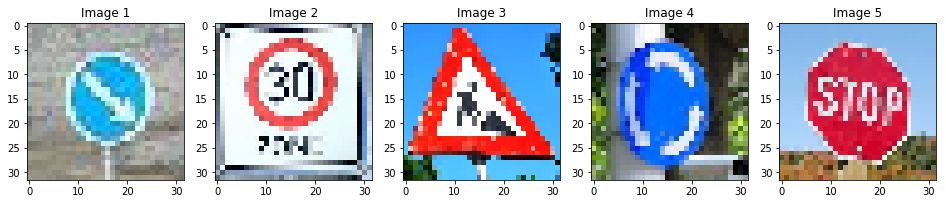

In [27]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

# Referenced from: http://effbot.org/imagingbook/image.htm and 
# http://stackoverflow.com/questions/7762948/how-to-convert-an-rgb-image-to-numpy-array

from PIL import Image

image_data_array = []
number_of_images = 5

plt.figure(figsize=(50,20))

internet_y_labels = [38,1,25,40,14]

for index in range(1,number_of_images+1):
    image = Image.open('image{}.jpg'.format(index))
    image = image.resize((32,32))
    image.load()
    data = np.asarray(image, dtype=np.uint8)
    image_data_array.append(data)
    print('Appended Image {}'.format(index))
    
    plt.subplot(1,15,index)
    plt.title('Image {}'.format(index))
    plt.imshow(image_data_array[index-1])
    plt.show

### Predict the Sign Type for Each Image

In [28]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, "./tmp/model.ckpt")
    print("Model restored.")
    
    prediction_indices = sess.run(tf.argmax(logits, 1), feed_dict={x: image_data_array, y: internet_y_labels, keep_prob: 1})
    softmax_array = sess.run(tf.nn.softmax(logits), feed_dict={x: image_data_array, y: internet_y_labels, keep_prob: 1})
    top_softmax_values_array = sess.run(tf.nn.top_k(softmax_array, k=5))
    
    for i in range(0,number_of_images):
        prediction_label = sign_identifier_dictionary[prediction_indices[i]][SIGN_NAME_KEY]
        answer_label = sign_identifier_dictionary[internet_y_labels[i]][SIGN_NAME_KEY]
        print('{} - Model Label Prediction: {} /// Correct Label: {}'.format(i+1,prediction_label, answer_label))
        

Model restored.
1 - Model Label Prediction: Keep right /// Correct Label: Keep right
2 - Model Label Prediction: Speed limit (50km/h) /// Correct Label: Speed limit (30km/h)
3 - Model Label Prediction: Road work /// Correct Label: Road work
4 - Model Label Prediction: Roundabout mandatory /// Correct Label: Roundabout mandatory
5 - Model Label Prediction: Stop /// Correct Label: Stop


### Analyze Performance

In [29]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

total_correct = 0

for i in range(0,number_of_images):
    if prediction_indices[i] == internet_y_labels[i]:
        total_correct += 1
internet_accuracy = total_correct / number_of_images
print('The model had a prediction accuracy of {}'.format(internet_accuracy))

The model had a prediction accuracy of 0.8


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

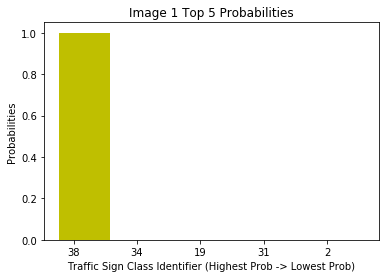

Image 1 had the following top 5 probabilities (from highest to lowest):
1- Label: 38 Prob: 1.0
2- Label: 34 Prob: 3.643035309183751e-13
3- Label: 19 Prob: 2.1739703678740063e-13
4- Label: 31 Prob: 9.445849864005845e-14
5- Label: 2 Prob: 2.235444461647345e-14



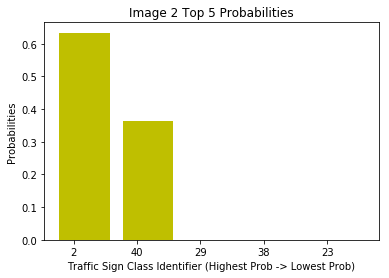

Image 2 had the following top 5 probabilities (from highest to lowest):
1- Label: 2 Prob: 0.6339226365089417
2- Label: 40 Prob: 0.36450743675231934
3- Label: 29 Prob: 0.0009071904933080077
4- Label: 38 Prob: 0.00034489890094846487
5- Label: 23 Prob: 9.156821761280298e-05



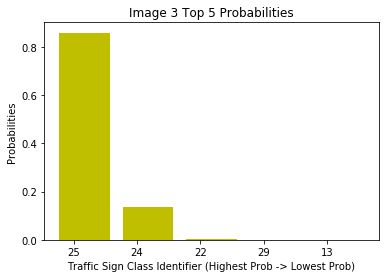

Image 3 had the following top 5 probabilities (from highest to lowest):
1- Label: 25 Prob: 0.8599514365196228
2- Label: 24 Prob: 0.1381988674402237
3- Label: 22 Prob: 0.0015620084013789892
4- Label: 29 Prob: 0.0002867655421141535
5- Label: 13 Prob: 3.5269482623334625e-07



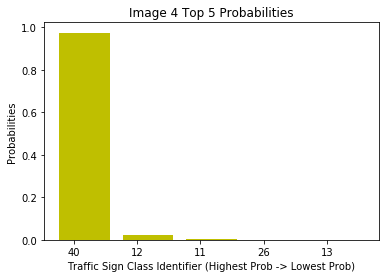

Image 4 had the following top 5 probabilities (from highest to lowest):
1- Label: 40 Prob: 0.9753833413124084
2- Label: 12 Prob: 0.02241145819425583
3- Label: 11 Prob: 0.0020785972010344267
4- Label: 26 Prob: 7.425632793456316e-05
5- Label: 13 Prob: 3.149180702166632e-05



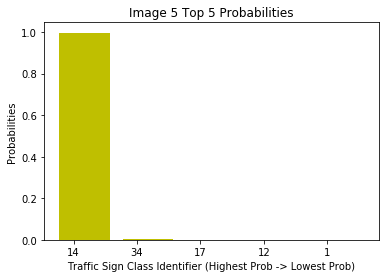

Image 5 had the following top 5 probabilities (from highest to lowest):
1- Label: 14 Prob: 0.9963745474815369
2- Label: 34 Prob: 0.0025643929839134216
3- Label: 17 Prob: 0.0005195229314267635
4- Label: 12 Prob: 0.00014130926865618676
5- Label: 1 Prob: 0.00012267449346836656



In [43]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

#References: http://matplotlib.org/examples/api/barchart_demo.html
    
width = 0.35
N = 5
indentation = np.arange(N)
    
for i in range(0,number_of_images):
    fig, softmax_plot = plt.subplots()
    x_values = top_softmax_values_array[1]
    y_values = top_softmax_values_array[0]
    
    rects1 = softmax_plot.bar(indentation+width, top_softmax_values_array.values[i], color='y')
    
    softmax_plot.set_ylabel('Probabilities')
    softmax_plot.set_xlabel('Traffic Sign Class Identifier (Highest Prob -> Lowest Prob)')
    softmax_plot.set_title('Image {} Top 5 Probabilities'.format(i+1))
    softmax_plot.set_xticks(indentation + width / 2)
    softmax_plot.set_xticklabels(top_softmax_values_array.indices[i])
    
    plt.show()
    
    print('Image {} had the following top 5 probabilities (from highest to lowest):'.format(i+1))
    
    for index in range(0, 5):
        print('{}- Label: {} Prob: {}'.format(index+1, top_softmax_values_array.indices[i][index], top_softmax_values_array.values[i][index]))
    
    print()



> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 